In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 23.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=261b8a6325c376d87509a024614a9ae27439936061f49984de2f50f17c490678
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

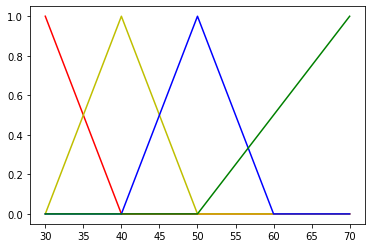

In [ ]:
x = np.arange(30,71,1)
slow = fuzz.trimf(x,[30,30,40])             #Hàm trimf(x,[a,b,c])-Hàm tam giác
medium = fuzz.trimf(x,[30,40,50])
medium_fast = fuzz.trimf(x,[40,50,60])
full_speed = fuzz.trimf(x,[50,70,70])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')
plt.plot(x,medium,'y',linewidth=1.5,label='Medium')
plt.plot(x,medium_fast,'b',linewidth=1.5,label='Medium Fast')
plt.plot(x,full_speed,'g',linewidth=1.5,label='Full Speed')

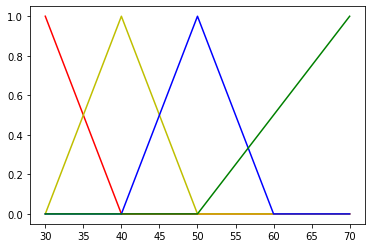

In [ ]:
x = np.arange(30,71,1)
slow = fuzz.trapmf(x,[30,30,30,40])             #Hàm trapmf(x,[a,b,c,d])-Hàm hình thang
medium = fuzz.trapmf(x,[30,40,40,50])
medium_fast = fuzz.trapmf(x,[40,50,50,60])
full_speed = fuzz.trapmf(x,[50,70,70,70])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')
plt.plot(x,medium,'y',linewidth=1.5,label='Medium')
plt.plot(x,medium_fast,'b',linewidth=1.5,label='Medium Fast')
plt.plot(x,full_speed,'g',linewidth=1.5,label='Full Speed')

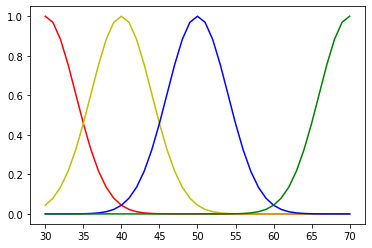

In [ ]:
x = np.arange(30,71,1)
slow = fuzz.gaussmf(x,30,4)             #Hàm gaussmf(x,a,b)-Hình cong parabol
medium = fuzz.gaussmf(x,40,4)
medium_fast = fuzz.gaussmf(x,50,4)
full_speed = fuzz.gaussmf(x,70,4)
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')
plt.plot(x,medium,'y',linewidth=1.5,label='Medium')
plt.plot(x,medium_fast,'b',linewidth=1.5,label='Medium Fast')
plt.plot(x,full_speed,'g',linewidth=1.5,label='Full Speed')

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

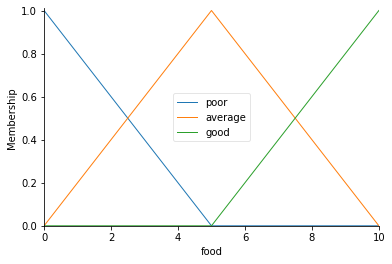

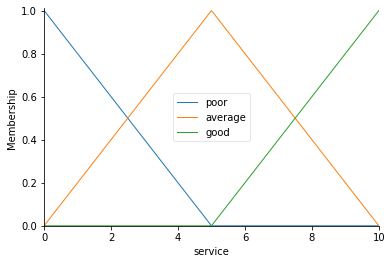

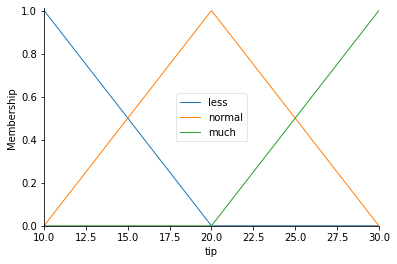

In [ ]:
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')
food['poor']= fuzz.trimf(food.universe,[0,0,5])
food['average']= fuzz.trimf(food.universe,[0,5,10])
food['good']= fuzz.trimf(food.universe,[5,10,10])
service['poor']= fuzz.trimf(service.universe,[0,0,5])
service['average']= fuzz.trimf(service.universe,[0,5,10])
service['good']= fuzz.trimf(service.universe,[5,10,10])
tip['less']= fuzz.trimf(tip.universe,[10,10,20])
tip['normal']= fuzz.trimf(tip.universe,[10,20,30])
tip['much']= fuzz.trimf(tip.universe,[20,30,30])
food.view()
service.view()
tip.view()

In [ ]:
rule_1=ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule_2=ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule_3=ctrl.Rule(food['poor'] & service['good'], tip['less'])
rule_4=ctrl.Rule(food['average'] & service['poor'], tip['less'])
rule_5=ctrl.Rule(food['average'] & service['average'], tip['normal'])
rule_6=ctrl.Rule(food['average'] & service['good'], tip['normal'])
rule_7=ctrl.Rule(food['good'] & service['poor'], tip['normal'])
rule_8=ctrl.Rule(food['good'] & service['average'], tip['much'])
rule_9=ctrl.Rule(food['good'] & service['good'], tip['much'])

20.424083769633505


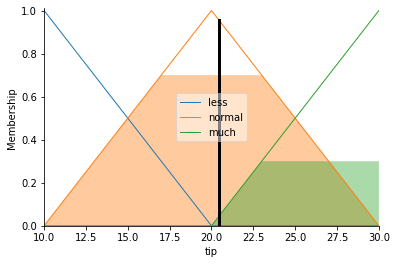

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8,rule_9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 6.5
tipping.input['service'] = 9.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

26.666666666666657


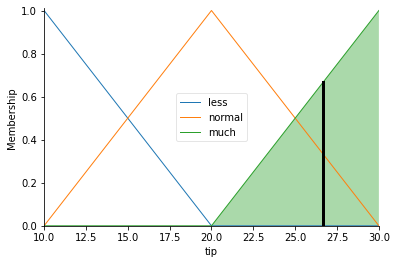

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8,rule_9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 10
tipping.input['service'] = 10
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

13.333333333333334


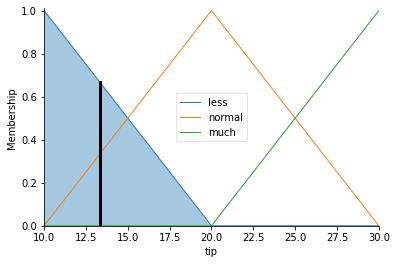

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8,rule_9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 0
tipping.input['service'] = 0
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

Mòi bạn đánh giá
Đồ àn: 9
Phục vụ: 10
23.45098039215687


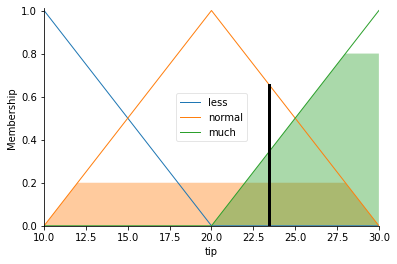

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8,rule_9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
print('Mòi bạn đánh giá')
a = float(input("Đồ àn: "))
b = float(input("Phục vụ: "))
tipping.input['food'] = a
tipping.input['service'] = b
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)